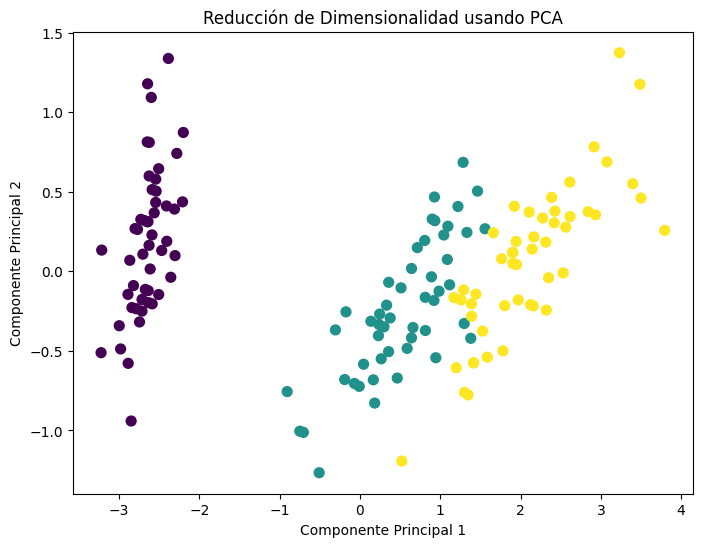

In [1]:
# Importar las librerías necesarias
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import load_iris
from sklearn.decomposition import PCA
from sklearn.manifold import TSNE
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis as LDA

# Cargar el conjunto de datos de iris
iris = load_iris()
X = iris.data
y = iris.target

# Aplicar PCA
pca = PCA(n_components=2)
X_pca = pca.fit_transform(X)

# Visualización de PCA
plt.figure(figsize=(8, 6))
plt.scatter(X_pca[:, 0], X_pca[:, 1], c=y, cmap='viridis', s=50)
plt.title("Reducción de Dimensionalidad usando PCA")
plt.xlabel("Componente Principal 1")
plt.ylabel("Componente Principal 2")
plt.show()


PCA: En la visualización generada por PCA, se puede observar cómo las dos primeras componentes principales capturan la mayor parte de la varianza en los datos. PCA es particularmente efectivo para capturar la estructura global de los datos, pero puede no ser tan detallado en la preservación de relaciones locales como t-SNE.

In [2]:
import pandas as pd

# Aplicar PCA
pca = PCA(n_components=4)  # Se puede cambiar el número de componentes si es necesario
pca.fit(X)

# Ver la varianza explicada por cada componente
print("Varianza explicada por cada componente:", pca.explained_variance_ratio_)

# Ver la varianza acumulada
print("Varianza acumulada:", pca.explained_variance_ratio_.cumsum())

# Crear un DataFrame para visualizar mejor los resultados
varianza_df = pd.DataFrame({
    'Componente': [f'PC{i+1}' for i in range(len(pca.explained_variance_ratio_))],
    'Varianza Explicada': pca.explained_variance_ratio_,
    'Varianza Acumulada': pca.explained_variance_ratio_.cumsum()
})

print(varianza_df)


Varianza explicada por cada componente: [0.92461872 0.05306648 0.01710261 0.00521218]
Varianza acumulada: [0.92461872 0.97768521 0.99478782 1.        ]
  Componente  Varianza Explicada  Varianza Acumulada
0        PC1            0.924619            0.924619
1        PC2            0.053066            0.977685
2        PC3            0.017103            0.994788
3        PC4            0.005212            1.000000


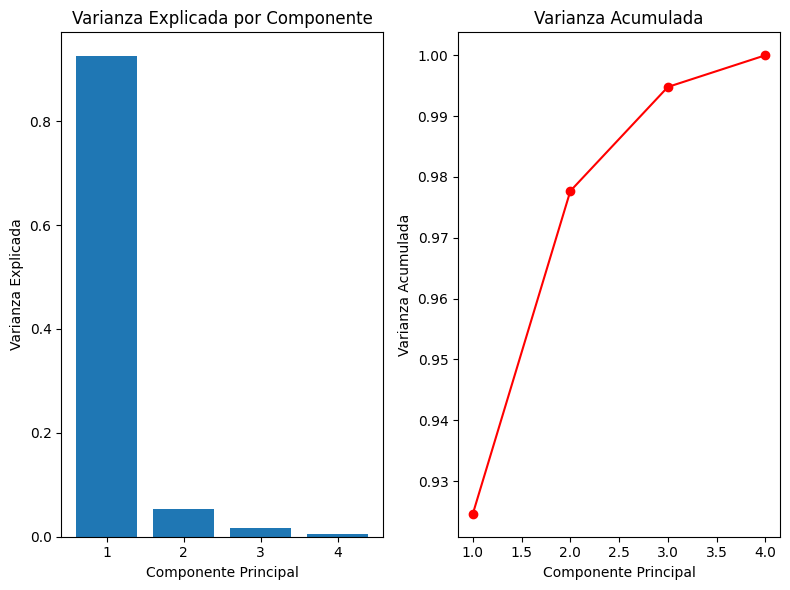

In [3]:
# Graficar varianza explicada
plt.figure(figsize=(8, 6))

# Varianza explicada por cada componente
plt.subplot(1, 2, 1)
plt.bar(range(1, len(pca.explained_variance_ratio_) + 1), pca.explained_variance_ratio_)
plt.xlabel('Componente Principal')
plt.ylabel('Varianza Explicada')
plt.title('Varianza Explicada por Componente')

# Varianza acumulada
plt.subplot(1, 2, 2)
plt.plot(range(1, len(pca.explained_variance_ratio_) + 1), pca.explained_variance_ratio_.cumsum(), marker='o', color='r')
plt.xlabel('Componente Principal')
plt.ylabel('Varianza Acumulada')
plt.title('Varianza Acumulada')

plt.tight_layout()
plt.show()

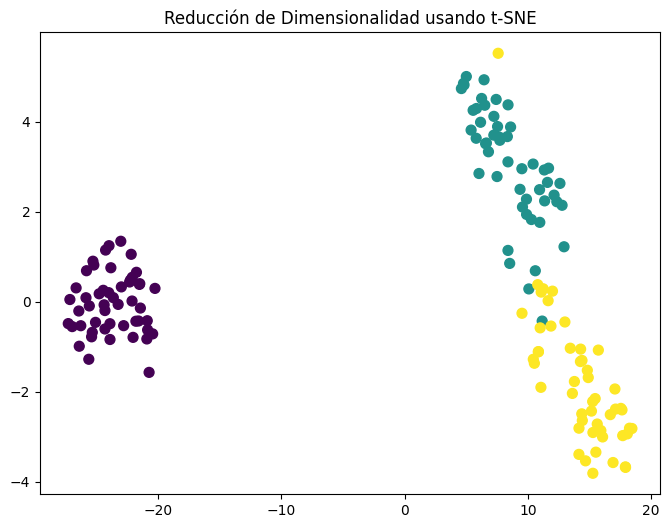

In [4]:

# Aplicar t-SNE
tsne = TSNE(n_components=2, random_state=0)
X_tsne = tsne.fit_transform(X)
# Visualización de t-SNE
plt.figure(figsize=(8, 6))
plt.scatter(X_tsne[:, 0], X_tsne[:, 1], c=y, cmap='viridis', s=50)
plt.title("Reducción de Dimensionalidad usando t-SNE")
plt.show()


t-SNE: t-SNE proporciona una visualización más detallada, capturando mejor las relaciones locales entre los puntos. Esto es evidente en la clara separación de las clases en el gráfico, lo que hace que t-SNE sea ideal para la visualización de datos complejos.
**Busca preservar las relaciones de proximidad en los datos al reducir las dimensiones.** 

**t-SNE no calcula "varianza explicada"** porque no es un proceso que maximiza la varianza de manera directa, sino que se enfoca en la similitud de los puntos en el espacio reducido. Es más adecuado para visualización y no está diseñado para ofrecer un desglose de la "importancia" de cada componente.

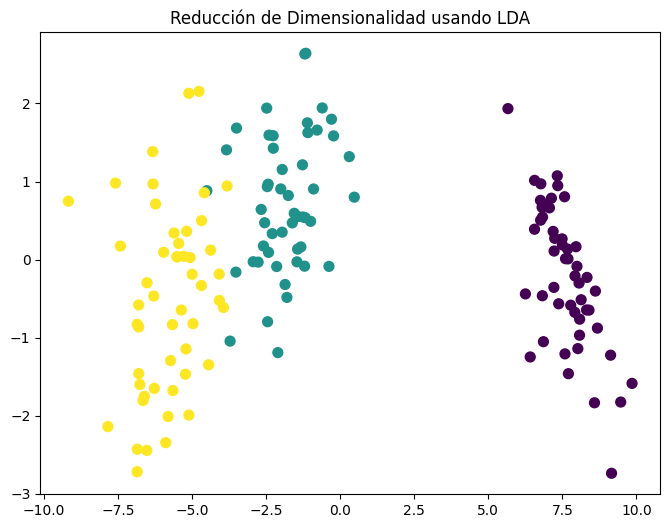

In [5]:
# Aplicar LDA
lda = LDA(n_components=2)
X_lda = lda.fit_transform(X, y)

# Visualización de LDA
plt.figure(figsize=(8, 6))
plt.scatter(X_lda[:, 0], X_lda[:, 1], c=y, cmap='viridis', s=50)
plt.title("Reducción de Dimensionalidad usando LDA")
plt.show()

LDA: LDA, al ser una técnica supervisada, muestra una excelente separación de las clases en el espacio de menor dimensión, lo que lo hace útil para tareas de clasificación. En este caso, la proyección de los datos mediante LDA maximiza la separación entre las clases, lo que facilita la clasificación posterior.

# Diferencias clave:
- PCA se enfoca en maximizar la varianza y te da información sobre cómo cada componente contribuye a esta varianza.
- t-SNE no tiene una medida comparable a la "varianza explicada" y está más centrado en preservar relaciones de vecindad (es decir, grupos de datos similares entre sí).
- Objetivo de LDA: LDA es supervisado, lo que significa que intenta encontrar una proyección de los datos que maximice la separabilidad entre clases. En otras palabras, LDA busca crear nuevas dimensiones (componentes) donde las clases sean lo más separadas posible.
- LDA vs PCA: Mientras que PCA es un enfoque no supervisado que maximiza la varianza de los datos en general, LDA es supervisado y se enfoca en la separación de las clases en los datos.